**Example 1**


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

**Example 2**

In [6]:

data= pd.read_csv('./wine qt.csv')
df=pd.DataFrame(data)
df.isnull().sum()


FileNotFoundError: [Errno 2] No such file or directory: './wine qt.csv'

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# df['quality'].unique()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
pipline = Pipeline([
    ('scaler',StandardScaler()),
     ('poly', PolynomialFeatures(degree=50)),  
    # ('estimator',LogisticRegression(multi_class='ovr',solver='liblinear', max_iter=5000))
    ('estimator',RandomForestClassifier())
])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV    
model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
# # Initialize StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)  # Single split
df = df[df['quality'] != 3]
df = df[df['quality'] != 4]
df = df[df['quality'] != 8]
df = df[df['quality'] != 7]
x=df[['citric acid','volatile acidity','sulphates','alcohol']].values
y=df['quality'].values

for train_index, test_index in sss.split(x, y):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    # Here you can train and evaluate your model using X_train, y_train, X_test, y_test
    grid_search.fit(xtrain, ytrain)

In [ ]:
ypred = grid_search.predict(xtest)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.4f}")
print(f"Best Score: {best_score}")

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.7394
Best Score: 0.73943882886023


In [ ]:
from sklearn.model_selection import train_test_split
df = df[df['quality'] != 3]
x=df[['citric acid','volatile acidity','sulphates','alcohol']]
y=df['quality']
# grid_search.fit(x, y)
# # Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Score: {best_score:.4f}")
# print(f"Best Score: {best_score}")

# x=df.drop('Class',axis=1)
# x=df[['alcohol']]
# y=df['Class']

# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.1,random_state=20)

In [ ]:
# print(grid_search.best_estimator_)

In [ ]:
# pipline.fit(xtrain,ytrain)
# ypred = pipline.predict(xtest)

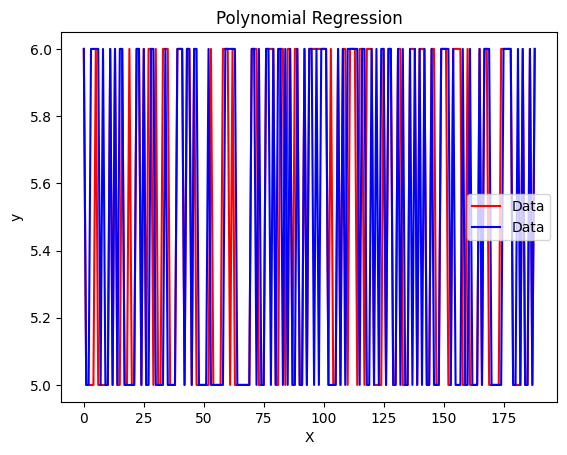

In [ ]:
plt.plot(np.arange(len(ytest)), ytest, color='red',label='Data')
plt.plot(np.arange(len(ytest)), ypred, color='blue',label='Data')
# plt.plot(X, y_pred, color='blue',label='Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred)

print(f"OvR Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

OvR Accuracy: 0.72
Confusion Matrix:
 [[73 24]
 [28 64]]
Classification Report:
               precision    recall  f1-score   support

           5       0.72      0.75      0.74        97
           6       0.73      0.70      0.71        92

    accuracy                           0.72       189
   macro avg       0.73      0.72      0.72       189
weighted avg       0.72      0.72      0.72       189

